In [1]:
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.ensemble import RandomForestClassifier
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('train.csv', encoding = 'latin1')
df = df.sample(frac = 1)
df

,sms,label
3905,Your 2004 account for 07XXXXXXXXX shows 786 un...,1
4947,I'm already back home so no probably not\n,0
2104,Its a site to simulate the test. It just gives...,0
3189,This is the 2nd time we have tried 2 contact u...,1
58,Tell where you reached\n,0
...,...,...
3805,"No dude, its not fake..my frnds got money, tht...",0
2972,Height of Confidence: All the Aeronautics prof...,0
1568,"whatever, im pretty pissed off.\n",0
3166,Cheers for the card ... Is it that time of yea...,0


In [3]:
#No of a categories
len(set(df['label']))

2

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5574 entries, 3905 to 2476
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 130.6+ KB


In [5]:
df.groupby('label').label.count()

label
0    4827
1     747
Name: label, dtype: int64

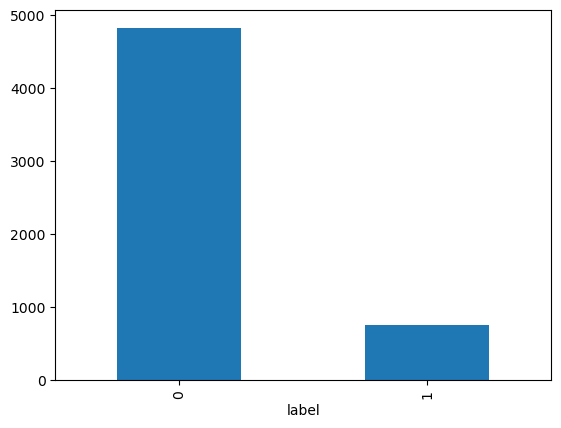

In [6]:
#Analyzing data
df.groupby('label').label.count().plot.bar()
plt.show()

In [7]:
# Data Cleaning using regex
regs = re.sub("[^a-zA-Z]", " ", df['sms'][0]).lower()
regs

'go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat    '

In [8]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()
data = "I am loving computing".split()
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")

'i am love comput'

In [10]:
# Data Cleaning removing stopwords
words = stopwords.words("english")
without_stop_words_of_a_news = " ".join([i for i in regs.lower().split() if i not in words])
without_stop_words_of_a_news

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [11]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
df['cleaned'] = list(filter(lambda x: [i for i in re.sub("[^a-zA-Z]", " ", x)],df['sms']))
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in x.lower().split()]))
df

,sms,label,cleaned
3905,Your 2004 account for 07XXXXXXXXX shows 786 un...,1,your 2004 account for 07xxxxxxxxx show 786 unr...
4947,I'm already back home so no probably not\n,0,i'm alreadi back home so no probabl not
2104,Its a site to simulate the test. It just gives...,0,it a site to simul the test. it just give you ...
3189,This is the 2nd time we have tried 2 contact u...,1,thi is the 2nd time we have tri 2 contact u. u...
58,Tell where you reached\n,0,tell where you reach
...,...,...,...
3805,"No dude, its not fake..my frnds got money, tht...",0,"no dude, it not fake..mi frnd got money, tht y..."
2972,Height of Confidence: All the Aeronautics prof...,0,height of confidence: all the aeronaut profess...
1568,"whatever, im pretty pissed off.\n",0,"whatever, im pretti piss off."
3166,Cheers for the card ... Is it that time of yea...,0,cheer for the card ... is it that time of year...


In [12]:
#cleaning dataset
nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
words.extend(['a','an','the'])
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x.lower()).split() if i not in words]).lower())
# df['newcleaned'] = [(i for i in list(df['cleaned'])).split() if i not in words ]
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sms,label,cleaned
3905,Your 2004 account for 07XXXXXXXXX shows 786 un...,1,account xxxxxxxxx show unredeem point claim ca...
4947,I'm already back home so no probably not\n,0,alreadi back home probabl
2104,Its a site to simulate the test. It just gives...,0,site simul test give veri tough question test ...
3189,This is the 2nd time we have tried 2 contact u...,1,thi nd time tri contact u u pound prize claim ...
58,Tell where you reached\n,0,tell reach
...,...,...,...
3805,"No dude, its not fake..my frnds got money, tht...",0,dude fake mi frnd got money tht reffer u u mem...
2972,Height of Confidence: All the Aeronautics prof...,0,height confid aeronaut professor wer calld amp...
1568,"whatever, im pretty pissed off.\n",0,whatev im pretti piss
3166,Cheers for the card ... Is it that time of yea...,0,cheer card time year alreadi


In [13]:
df.to_csv('cleaned_news.csv')

In [14]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() ]).lower())
# df

In [15]:
# print(words)

In [16]:
# words = stopwords.words("nepali")
# words

In [17]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
# df

In [18]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer(stop_words="english")
X = df['cleaned']
Y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset

# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression(random_state=1))])

# from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC
# pipeline = Pipeline([
#     ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
#     ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#     ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM
# ])


# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
# with open('LogisticRegression.pickle', 'wb') as f:
#     pickle.dump(model, f)

In [19]:
print(X_test,y_test)

2985    said right giggl saw u would possibl first per...
546                                           ani special
3189    thi nd time tri contact u u pound prize claim ...
5570                                b go esplanad fr home
5472                                 thought slide enough
                              ...                        
403                                    hair cream ha ship
3744                  nah wednesday bring mini cheeto bag
507        mayb westshor hyde park villag place near hous
382               yeah sure give coupl minut track wallet
4255                                   cloth jewelri trip
Name: cleaned, Length: 837, dtype: object 2985    0
546     0
3189    1
5570    0
5472    0
       ..
403     0
3744    0
507     0
382     0
4255    0
Name: label, Length: 837, dtype: int64


In [20]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_test)
print(accuracy_score(y_test,predict_news_cat))
print('\n')
print(predict_news_cat)

0.9713261648745519


[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0

In [21]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(model.predict(X_test),ytest))
print(confusion_matrix(model.predict(X_test),ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       747
           1       0.79      1.00      0.88        90

    accuracy                           0.97       837
   macro avg       0.89      0.98      0.93       837
weighted avg       0.98      0.97      0.97       837

[[723  24]
 [  0  90]]


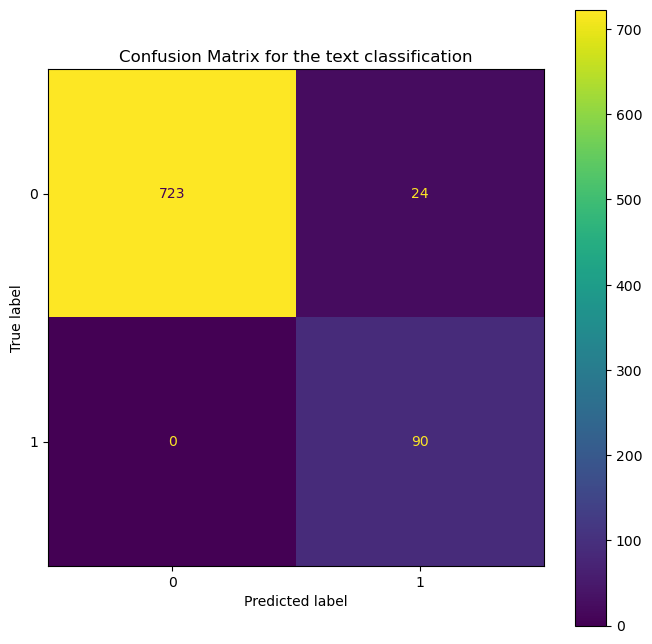

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),ytest)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['0','1']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the text classification')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);